Final centroids:
Cluster 0: [-0.33514647  3.62624134]
Cluster 1: [-1.73612968  7.46038138]
Cluster 2: [-0.85818041  8.16999589]
Cluster 3: [1.98726097 0.90144281]


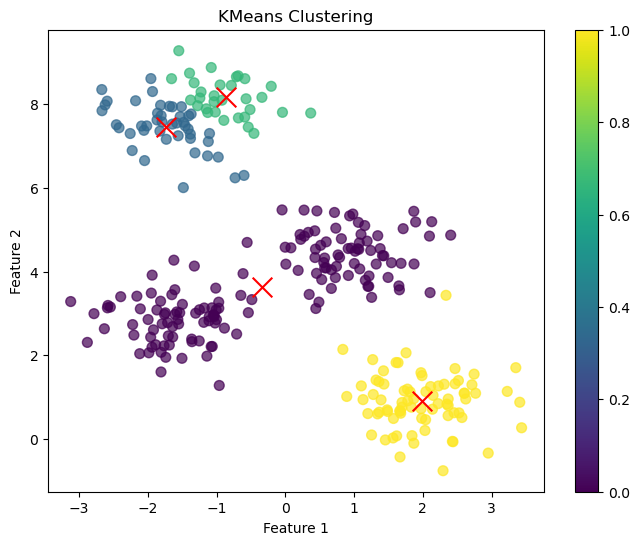

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Step 2: Generate Sample Data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Step 3: Define KMeans Class
class KMeans:
    def __init__(self, n_clusters, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
    
    def fit(self, X):
        # Initialize centroids randomly
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        self.history_centroids = []
        
        for _ in range(self.max_iter):
            self.history_centroids.append(self.centroids)
            
            # Assign each data point to the nearest centroid
            clusters = self._assign_clusters(X)
            
            # Update centroids based on the mean of points in each cluster
            new_centroids = np.array([X[clusters == k].mean(axis=0) for k in range(self.n_clusters)])
            
            # Check for convergence
            if np.all(self.centroids == new_centroids):
                break
            
            self.centroids = new_centroids
        
        self.labels_ = self._assign_clusters(X)
        return self
    
    def _assign_clusters(self, X):
        distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)
    
    def predict(self, X):
        distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)

# Step 4: Fit KMeans to Sample Data
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

# Print details
print("Final centroids:")
for i, centroid in enumerate(kmeans.centroids):
    print(f"Cluster {i}: {centroid}")

# Plotting clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], marker='x', s=200, color='red')
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()
